# Clean And Analyze Employee Exit Surveys
In this project, we will be exploring the data on the exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia. 

We seek to find out the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will aim to do the data cleaning and combined the results for both surveys to answer the above questions.


The following are some interpretations of the important columns in each dataset:

### <center>Department of Education, Training and Employment (DETE)</center>

|Column|Description|
| :--- | :--- |
|ID | An id used to identify the participant of the survey|
|SeparationType| The reason why the person's employment ended|
|Cease Date| The year or month the person's employment ended|
|DETE Start Date| The year the person began employment with the DETE|

### <center>Technical and Further Education (TAFE)</center>
|Column|Description|
|:---|:---|
|Record ID| An id used to identify the participant of the survey|
|Reason for ceasing employment| The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)| The length of the person's employment (in years)|

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

dete_survey=pd.read_csv('dete_survey.csv')

#exploring dete_survey
display(dete_survey[['ID','SeparationType','Cease Date','DETE Start Date']].head(10))
display(dete_survey['DETE Start Date'].value_counts())
display(dete_survey['Cease Date'].value_counts())
display(dete_survey.info())
print("---------------------------------------------------------------------"+"\n"+"Columns and number of null values")
display(dete_survey.isnull().sum())

,ID,SeparationType,Cease Date,DETE Start Date
0,1,Ill Health Retirement,08/2012,1984
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated
2,3,Voluntary Early Retirement (VER),05/2012,2011
3,4,Resignation-Other reasons,05/2012,2005
4,5,Age Retirement,05/2012,1970
5,6,Resignation-Other reasons,05/2012,1994
6,7,Age Retirement,05/2012,1972
7,8,Age Retirement,05/2012,1988
8,9,Resignation-Other reasons,07/2012,2009
9,10,Resignation-Other employer,2012,1997


Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1970          21
2013          21
1975          21
1990          20
2005          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1988          15
1978          15
1976          15
2003          15
2002          15
1998          14
1979          14
1995          14
1980          14
1997          14
1974          14
1993          13
1986          12
1972          12
1977          11
1969          10
1971          10
2001          10
1994          10
1984          10
1981           9
1983           9
1973           8
1985           8
1987           7
1963           4
1982           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
04/2014         2
07/2014         2
04/2013         2
08/2012         2
09/2010         1
11/2012         1
07/2006         1
09/2014         1
2014            1
2010            1
07/2012         1
Name: Cease Date, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

None

---------------------------------------------------------------------
Columns and number of null values


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [2]:
#exploring tafe_survey
tafe_survey=pd.read_csv('tafe_survey.csv')
display(tafe_survey.head())
display(tafe_survey.info())
print("Columns and number of null values")
display(tafe_survey.isnull().sum())

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

None

Columns and number of null values


Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

## Reloading Data
From the results above, we can see that dete_survey.csv represents missing data as "Not Stated". Hence, let us import the dataset again and qualify "Not Stated" as NaN.

In [3]:
dete_survey= pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop irrelevant columns from dete dataset
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop irrelevant columns from tafe dataset
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


For this project, we are focused on the following columns: 
<table class="tg">
<tbody><tr>
<th>dete_survey<br></th>
<th>tafe_survey</th>
<th>Definition</th>
</tr>
<tr>
<td>ID</td>
<td>Record ID</td>
<td>An id used to identify the participant of the survey</td>
</tr>
<tr>
<td>SeparationType</td>
<td>Reason for ceasing <br>employment<br></td>
<td>The reason why the participant's employment ended</td>
</tr>
<tr>
<td>Cease Date</td>
<td>CESSATION YEAR</td>
<td>The year or month the participant's employment ended</td>
</tr>
<tr>
<td>DETE Start Date</td>
<td></td>
<td>The year the participant began employment with the DETE</td>
</tr>
<tr>
<td></td>
<td>LengthofServiceOverall. <br>Overall Length of Service <br>at Institute (in years)<br><br></td>
<td>The length of the person's employment (in years)</td>
</tr>
<tr>
<td>Age</td>
<td>CurrentAge. <br>Current Age<br></td>
<td>The age of the participant</td>
</tr>
<tr>
<td>Gender</td>
<td>Gender. <br>What is your Gender?<br></td>
<td>The gender of the participant</td>
</tr>
</tbody></table>

As we want to combine the 2 tables eventually, we are going to standardise and rename the columns by:
- Making all the capitalization lowercase.
- Removing any trailing whitespace from the end of the strings.
- Replacing spaces with underscores ('_').

In [6]:
#rename dete columns
dete_survey_updated.columns= dete_survey_updated.columns.str.replace('\s+','_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
#rename tafe columns with a dictionary
tafe_columns={
'Record ID': 'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(tafe_columns, axis=1, inplace=True)
display(tafe_survey_updated.head())
display(dete_survey_updated.head())

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Since we are only interested in employees who have resigned, we will isolate the rows where `separationtype` column contains the string 'Resignation'.

In [8]:
display(dete_survey_updated['separationtype'].value_counts())
display(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

DETE dataset contains multiple separation types that contain the string 'Resignation' while TAFE dataset only has one separation type that contains the exact string 'Resignation'.

In [9]:
pattern= r"[Rr]esignation"
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)].copy()

#remove NaN values in tafe_survey_updated
non_na_rows=tafe_survey_updated[~tafe_survey_updated['separationtype'].isnull()]
tafe_resignations=non_na_rows[non_na_rows['separationtype'].str.contains(pattern)].copy()
print('TAFE[\'separationtype\'] value_counts')
print(tafe_resignations['separationtype'].value_counts())
print('\n')
print('DETE[\'separationtype\'] value_counts')
print(dete_resignations['separationtype'].value_counts())

TAFE['separationtype'] value_counts
Resignation    340
Name: separationtype, dtype: int64


DETE['separationtype'] value_counts
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


## Check the years in each dataframe for logical inconsistencies

First, we will manipulate both DETE and TAFE datasets and retain only the year portion of the date related columns.

In [10]:
print("DETE cease_date")
print(dete_resignations['cease_date'].value_counts())
print("\nDETE dete_start_date")
print(dete_resignations['dete_start_date'].value_counts())
print("\nTAFE cease_date")
print(tafe_resignations['cease_date'].value_counts())

DETE cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

DETE dete_start_date
2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

TAFE cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [11]:
#We only want to keep the year portion of the cease_date column

dete_resignations['cease_date']=dete_resignations['cease_date'].str.split(pat='/').str[-1].astype(float)

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Since the cease_date is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

We will display the dates to verify that there are no unrealistically high or low data for the date columns.

In [12]:
#display the dates in ascending order
print("DETE cease_date")
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=True))
print("\nDETE dete_start_date")
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True))
print("\nTAFE cease_date")
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=True))

DETE cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

DETE dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

TAFE cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


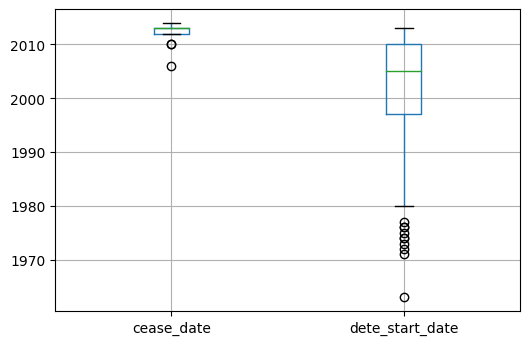

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# fig= plt.figure()
# ax1=fig.add_subplot(1,3,1)
# ax2=fig.add_subplot(1,3,2)
# ax3=fig.add_subplot(1,3,3)
# ax1.boxplot(dete_resignations['cease_date'])

# data=[dete_resignations['cease_date'],dete_resignations['dete_start_date'],tafe_resignations['cease_date']]
# print(data)
# ax.boxplot(data)

#use boxplot to identify any outliers
dete_resignations.boxplot(column=['cease_date','dete_start_date'])
plt.show()

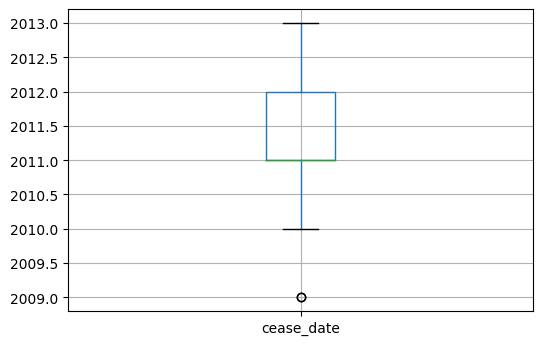

In [14]:
tafe_resignations.boxplot('cease_date')
plt.show()

From the box plots above, we can see that there are several outliers especially for `dete_start_date` column data. Even though the data might consist of outliers, they are still within reasonable range. Hence, we will not be removing them.

Now that we have checked the date columns, we will use them to create a new column `institute_service` by subtracting the `dete_start_date` from the `cease_date` and eventually answer the following questions:
1. Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
2. What about employees who have been at the job longer?



In [15]:
dete_resignations['institute_service']= dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now, we will look at how to categorise employees as 'dissatisfied' from each dataframe. 

TAFE: `Contributing Factors. Dissatisfaction` & `Contributing Factors. Job Dissatisfaction`

DETE: `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`,
`lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance` & `workload`

If any of the above is true, we deem that the employee resigned due to dissatisfaction.


In [16]:
display(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
display(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [17]:
#create a function to update values
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value=='-':
        return False
    else:
        return True

In [18]:
columns=['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[columns]=tafe_resignations[columns].applymap(update_vals)

In [19]:
display(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
display(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [20]:
#create dissatisfied column for tafe
#use .any() method to combine the 2 columns, True if either one is True, False if both are False and NaN if value is NaN
tafe_resignations['dissatisfied']= tafe_resignations[columns].any(axis=1, skipna=False)
#by using .any() method with skipna=False, we are keeping NaN values 
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [21]:
display(dete_resignations['job_dissatisfaction'].value_counts(dropna=False))
display(dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna=False))
display(dete_resignations['physical_work_environment'].value_counts(dropna=False))
display(dete_resignations['lack_of_recognition'].value_counts(dropna=False))
display(dete_resignations['lack_of_job_security'].value_counts(dropna=False))
display(dete_resignations['work_location'].value_counts(dropna=False))
display(dete_resignations['employment_conditions'].value_counts(dropna=False))
display(dete_resignations['work_life_balance'].value_counts(dropna=False))
display(dete_resignations['workload'].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

False    305
True       6
Name: physical_work_environment, dtype: int64

False    278
True      33
Name: lack_of_recognition, dtype: int64

False    297
True      14
Name: lack_of_job_security, dtype: int64

False    293
True      18
Name: work_location, dtype: int64

False    288
True      23
Name: employment_conditions, dtype: int64

False    243
True      68
Name: work_life_balance, dtype: int64

False    284
True      27
Name: workload, dtype: int64

In [22]:
#create dissatisfied column for dete
cols=['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition',
      'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied']= dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [23]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

Finally, we are done with data cleaning! Let us now begin combining our datasets before exploring further.

In [24]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [25]:
combined= pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#remove columns that have less than 500 non null values
combined_updated= combined.dropna(axis=1,thresh=500).copy()
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [27]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [28]:
#clean up this column by converting to string type then convert back to float
combined_updated['institute_service']=combined_updated['institute_service'].astype('str').str.replace('Less than 1 year', '0').str.replace('More than 20 years','20').copy()
combined_updated['institute_service']=combined_updated['institute_service'].str.split('-').str[0].str.split('.').str[0].copy()
combined_updated['institute_service'].value_counts()

0      93
nan    88
1      86
3      83
5      56
7      34
11     30
20     17
6      17
4      16
2      14
9      14
8       8
13      8
15      7
12      6
10      6
17      6
22      6
14      6
18      5
16      5
23      4
24      4
39      3
32      3
19      3
21      3
26      2
28      2
25      2
30      2
36      2
27      1
38      1
29      1
35      1
34      1
49      1
41      1
31      1
33      1
42      1
Name: institute_service, dtype: int64

In [29]:
#convert values back to float
combined_updated['institute_service']=combined_updated['institute_service'].astype('float')
combined_updated['institute_service'].value_counts(dropna=False)

0.0     93
NaN     88
1.0     86
3.0     83
5.0     56
7.0     34
11.0    30
20.0    17
6.0     17
4.0     16
9.0     14
2.0     14
13.0     8
8.0      8
15.0     7
22.0     6
10.0     6
17.0     6
14.0     6
12.0     6
16.0     5
18.0     5
24.0     4
23.0     4
21.0     3
39.0     3
32.0     3
19.0     3
36.0     2
30.0     2
25.0     2
26.0     2
28.0     2
42.0     1
29.0     1
35.0     1
27.0     1
41.0     1
49.0     1
38.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [30]:
def career_func(val):
    if pd.isnull(val):
        return 'Unknown'
    elif val<3:
        return 'New'
    elif val>=3 and val<=6:
        return 'Experienced'
    elif val>=7 and val<=10:
        return 'Established'
    else:
        return 'Veteran'

In [31]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(career_func)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Unknown         88
Established     62
Name: service_cat, dtype: int64

In [32]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
combined_updated[combined_updated['dissatisfied'].isnull()]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
322,6.341770e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
324,6.341779e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
345,6.342141e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
466,6.345510e+17,Resignation,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
472,6.345581e+17,Resignation,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
523,6.346963e+17,Resignation,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
543,6.347827e+17,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown
627,6.350124e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,Unknown


In [34]:
#replace the NaN values with the most common values in this column
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [35]:
combined_updated.pivot_table('dissatisfied', 'service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Unknown,0.295455
Veteran,0.485294


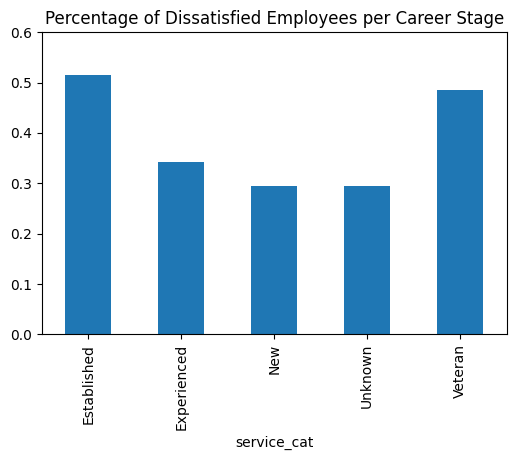

In [36]:
combined_updated.pivot_table('dissatisfied', 'service_cat').plot(
     kind='bar', 
     ylim = (0,0.6), 
     title = 'Percentage of Dissatisfied Employees per Career Stage', 
     legend=False)

plt.show()

In [37]:
combined_updated.pivot_table('dissatisfied', 'service_cat', aggfunc=np.sum)

,dissatisfied
service_cat,
Established,32.0
Experienced,59.0
New,57.0
Unknown,26.0
Veteran,66.0


## Observations
From the plot, we make the following observations:
- Around 50% of the Veteran and Established employees that resigned were dissatisfied
- Veterans who make up the highest number of dissatisfied employees also make up the most number of employees that left
- 29.5% of the New employees that left were dissatisfied, making this group the majority of employees that left

Lets further dig into the age column to verify if there is any correlation between age and dissatisfaction.

In [38]:
combined_updated['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '41  45',
       '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30'],
      dtype=object)

In [39]:
#rename the age values
#change space to '-'
combined_updated['age']=combined_updated['age'].str.replace('  ','-')
combined_updated['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '56 or older'],
      dtype=object)

In [40]:
combined_updated['age'].value_counts(dropna=False)
#remove NaN
combined_updated['age'].dropna(inplace=True)
combined_updated['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [41]:
#combine '56 or older' into '56-60'
combined_updated['age']=combined_updated['age'].str.replace('56 or older','56-60')
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-60            55
61 or older      23
Name: age, dtype: int64

In [45]:
combined_updated.pivot_table('dissatisfied', 'age')

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


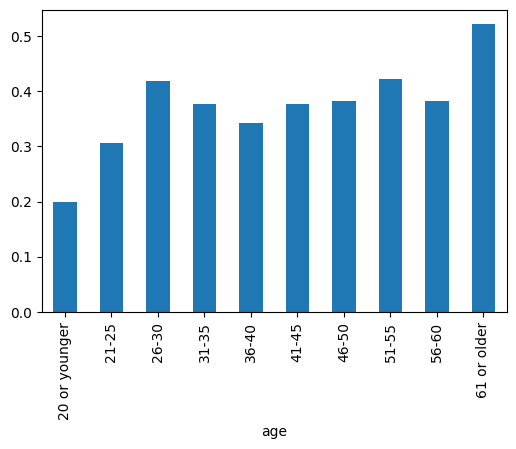

In [46]:
combined_updated.pivot_table('dissatisfied', 'age').plot(
kind='bar',
legend=False)
plt.show()

We see that employees that are age 61 or older have the highest percentage dissatisfied at 52.1%. This could be due to the lack of consideration for older employees which increases the feelings of discontent. However, we do not have enough data to determine if this statement is true.

Let us look at the individual institutes to see if the dissatisfaction is the same in both institutes or otherwise.

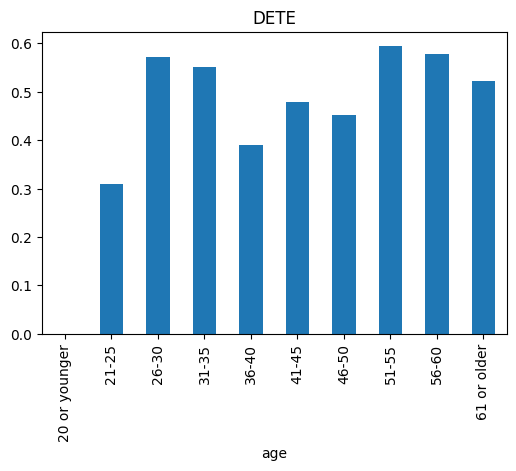

In [55]:
combined_updated[combined_updated['institute']== 'DETE'].pivot_table('dissatisfied', 'age').plot(
kind='bar',
legend=False,
title= 'DETE')
plt.show()

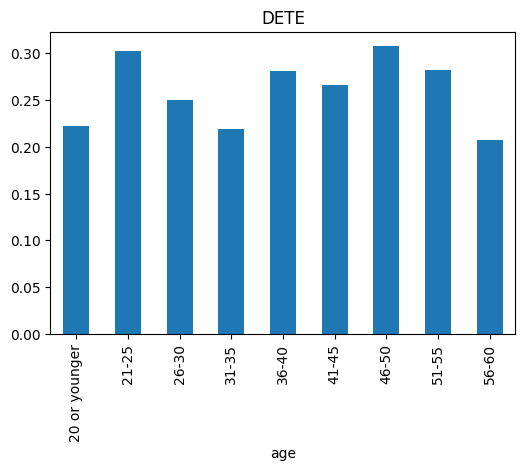

In [50]:
combined_updated[combined_updated['institute']== 'TAFE'].pivot_table('dissatisfied', 'age').plot(
kind='bar',
legend=False,
title= 'DETE')
plt.show()

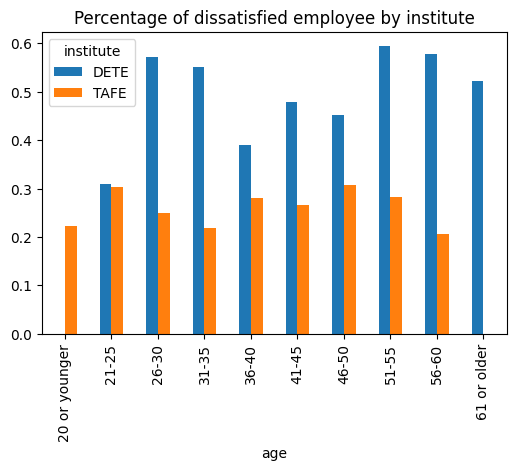

In [53]:
combined_updated.pivot_table(index='age', values='dissatisfied', columns=['institute']).plot(
kind='bar',
title='Percentage of dissatisfied employee by institute')
plt.show()

# Conclusion
From the graph above, We see that TAFE has a lower percentage of dissatisfied employee across all age groups as compared to DETE. 

Let us try to answer the questions we set out to solve.

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

<b>The data shows that longer serving employees tend to be more dissatisfied. This is evident as 51.6% of employees with 7 - 10 years of experience, stated job dissatisfaction as a reason for their resignation. Similarly for the Veteran group, 48.5% of resignations were due to dissatisfaction.</b>

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In the combined graph, we discovered that there is an overall trend of <I><b>increase</b></I> in percentage of employees leaving due to job dissatisfaction with <I><b>age</b></I>.

However, after breaking down the data to institute level, we see that there is <I><b>no clear trend</b></I> with regard to age. 

<b>Interestingly, when comparing the 2 institutes, we see a clear distinction where a higher percentage of employees are leaving due to job dissatisfaction in DETE. This is valuable information that can be further investigated to uncover real reasons to why employees are leaving with discontent.</b>